In [16]:
import matplotlib
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab as pl
from scipy.signal import butter, freqz, filtfilt, firwin, iirnotch, lfilter
matplotlib.style.use('ggplot')
%matplotlib notebook

In [42]:
def pull_data(dir_name, file_name):
    f = open(dir_name + '/' + file_name + '.csv')
    xs = []
    ys = []
    zs = []
    rs = []
    timestamps = []
    for line in f:
        value = line.split(',')
        if len(value) > 3:
            timestamps.append(float(value[-4]))
            x = float(value[-3])
            y = float(value[-2])
            z = float(value[-1])
            r = math.sqrt(x ** 2 + y ** 2 + z ** 2)
            xs.append(x)
            ys.append(y)
            zs.append(z)
            rs.append(r)
    return np.array(xs), np.array(ys), np.array(zs), np.array(rs), np.array(timestamps)

## Numpy Arrrays

In [17]:
# Creation of numpy array from list
a = np.array([1, 4, 5, 8], float)

# 2D dimensional arrays
b = np.array([[1, 2, 3, 4], [4, 5, 6, 7]], float)

print(a)
print(b)

[1. 4. 5. 8.]
[[1. 2. 3. 4.]
 [4. 5. 6. 7.]]


In [18]:
# Get dimensions of arrays
print(a.shape)
print(b.shape)

(4,)
(2, 4)


In [19]:
# You can convert 2D arrays to 1D using flatten
print(b.flatten())

[1. 2. 3. 4. 4. 5. 6. 7.]


In [21]:
# Array operations
c = np.array([4, 2, 4, 5])

# Elementwise
print(a+c)
print(a-c)
print(a/c)
print(a*c)

[ 5.  6.  9. 13.]
[-3.  2.  1.  3.]
[0.25 2.   1.25 1.6 ]
[ 4.  8. 20. 40.]
[[ 1.  8. 15. 32.]
 [ 4. 20. 30. 56.]]


In [24]:
# Careful about broadcasting - For example
print("a")
print(a)

print("b")
print(b)
# print(a*b)

a
[1. 4. 5. 8.]
b
[[1. 2. 3. 4.]
 [4. 5. 6. 7.]]


In [31]:
# Some useful array operations
print("Sum of elements: a.sum()", a.sum())
print("Mean of all elements in the array: a.mean()", a.mean())
print("Standard Deviation: a.std()", a.std())
print("Min elements: a.min()", a.min())
print("Index of the maximum element: a.argmax()", a.argmax())

Sum of elements: a.sum() 18.0
Mean of all elements in the array: a.mean() 4.5
Standard Deviation: a.std() 2.5
Min elements: a.min() 1.0
Index of the maximum element: a.argmax() 3


## Matplotlib

matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.

<IPython.core.display.Javascript object>


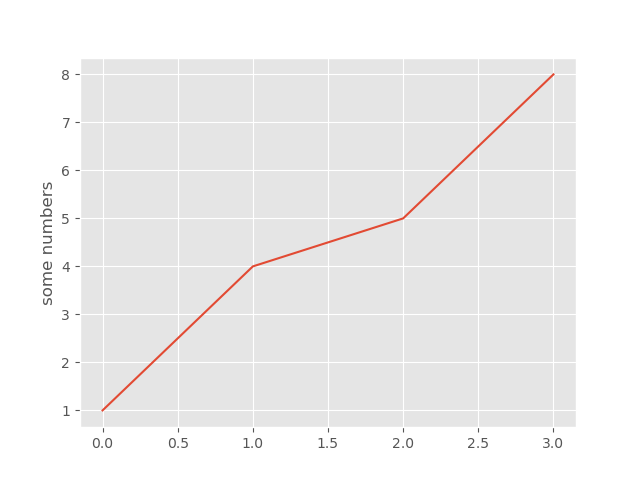

In [37]:
# Basic plotting
# In the most basic use case, you can give an array as argument to the plot function
# from matplotlib.pyplot

plt.plot(a)
plt.ylabel('some numbers')
plt.show()

<IPython.core.display.Javascript object>


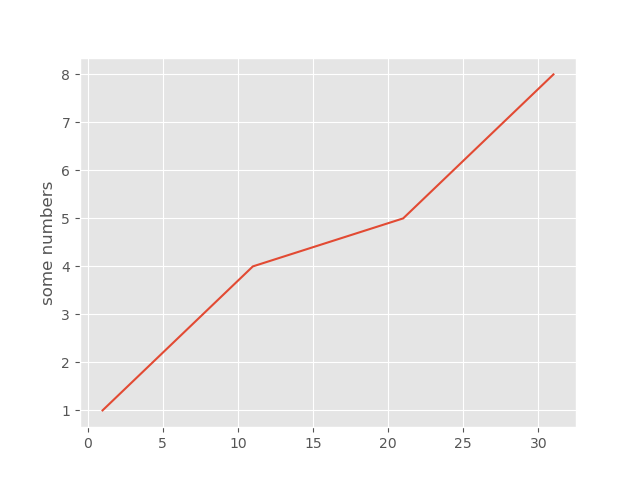

In [38]:
# By default matplotlib indices the datapoints from 0 with steps of 1.
# You can specify your own x-axis by passing 2 arguments to the function
plt.plot(range(1, a.shape[0]*10, 10), a)
plt.ylabel('some numbers')
plt.show()

<IPython.core.display.Javascript object>


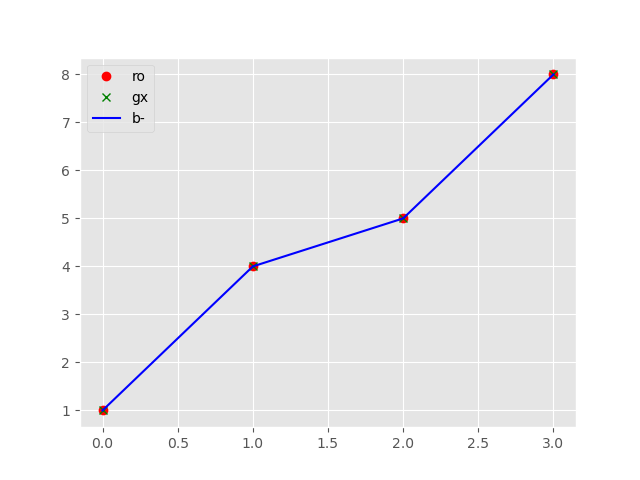

In [40]:
# You can format the style of your plot using the following additional argument
plt.plot(a, 'ro', label="ro")
plt.plot(a, 'gx', label="gx")
plt.plot(a, 'b-', label="b-")
plt.legend()
plt.show()

## Using Pylab

PyLab is a convenience module that bulk imports matplotlib.pyplot (for plotting) and NumPy (for Mathematics and working with arrays) in a single name space. Although many examples use PyLab, it is no longer recommended. We use it here for convenience really. Usually all you will need is matplotlib.pyplot module

<IPython.core.display.Javascript object>


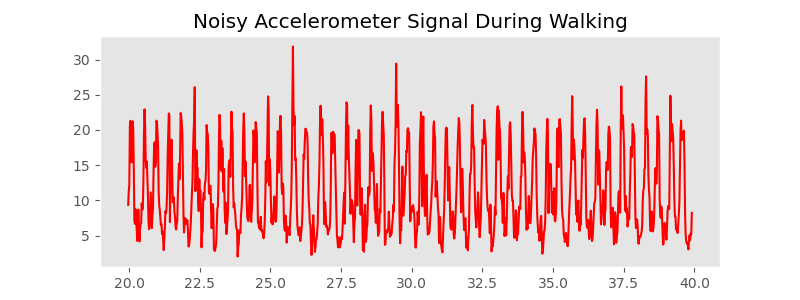

In [45]:
# read accelerometer data file
accel_file = 'data/inPocket-Steps'
x_data, y_data, z_data, signal, timestamps = pull_data(accel_file, 'accelerometer')

c = timestamps[0]
timestamps = (timestamps - c)/1000000000

signal = signal[1000:2000]
timestamps = timestamps[1000:2000]

# plot accelerometer data
plt.figure(figsize=(8,3))
pl.plot(timestamps, signal, 'r-',label='unfiltered')
plt.title("Noisy Accelerometer Signal During Walking")
pl.grid()
pl.show()

## Convolution Operation

An important mathematical operation for working with filters on a signal is the convolution operation. On a very high level It is a method by which two arrays are combined to create another array using multiplication and addition operations. For exact details see the illustration below.

See here: https://e2eml.school/convolution_one_d.html

This simple mathematical method is very powerful and therefore is used very widely in various fields like vision for complex tasks. 

Numpy provides us with a function that can perform this operation for us without implementing from scratch.

<IPython.core.display.Javascript object>


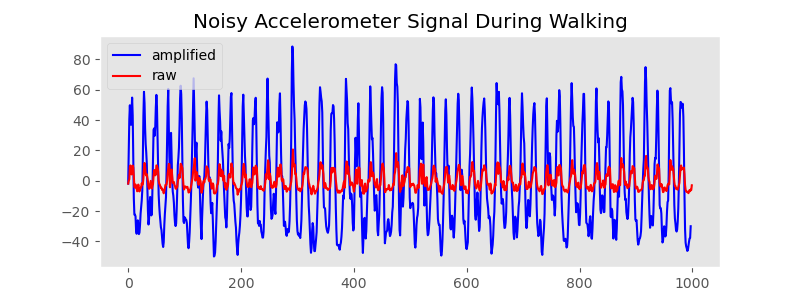

In [51]:
# Assume that I want to amplify the signal for some reason
signal = signal - np.mean(signal)

# By creating different types of kernels you can obtain different
# behaviour from the convolution operation
# Try to think how you will reduce the signal, apply mean average
kernel = np.ones((3,))*2
amplified_signal = np.convolve(signal, kernel, mode='valid')
# convolution changes the dimension of the signal if model='same' is not given
# Any convolution may result in artifacts in the edges,
# As we will be more concerned with the majority of signal we ignore the edges
# There may be applications where edges have to processed differently

# plot accelerometer data
plt.figure(figsize=(8,3))
pl.plot(amplified_signal, 'b-',label='amplified')
pl.plot(signal, 'r-',label='raw')
plt.title("Noisy Accelerometer Signal During Walking")
plt.legend()
pl.grid()
pl.show()

## Signal Processing using Scipy

scipy.signal gives functions for different signal processing techniques, Most of these techniques are based on some complex mathematical operations but the idea is to extract useful parts and remove the unwanted information from the raw signal.

Some common use of filters are for high pass, low pass, band pass, band stop

Sampling: http://microscopy.berkeley.edu/courses/dib/sections/02Images/sampling.html#:~:text=The%20Nyquist%20Theorem%20states%20that,to%20have%20a%20high%20frequency.

b:  [0.00018322 0.00073286 0.0010993  0.00073286 0.00018322]
a:  [ 1.         -3.34406784  4.23886395 -2.40934286  0.5174782 ]
b2:  [0.00018322 0.00073286 0.0010993  0.00073286 0.00018322]
a2:  [ 1.         -3.34406784  4.23886395 -2.40934286  0.5174782 ]


<IPython.core.display.Javascript object>


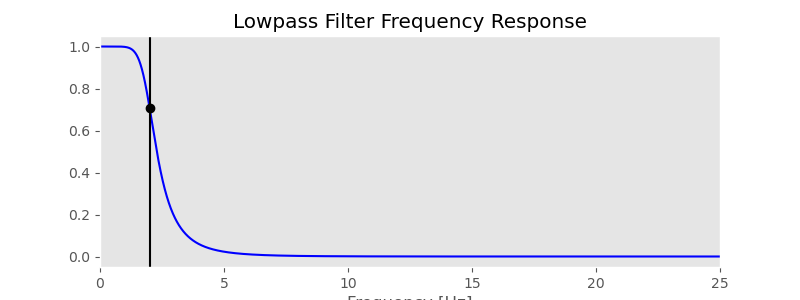

In [64]:
# Filter requirements.
order = 4
fs = 50.0  # sample rate, Hz
cutoff = 2  # desired cutoff frequency of the filter, Hz. MODIFY AS APPROPROATE

# Create the filter.
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq

# b and a represents coefficients of polynomial representing the filter
# b - numerator, a - dinominator
b, a = butter(order, normal_cutoff, btype='low', analog=False)
b2, a2 = butter(order+2, normal_cutoff, btype='low', analog=False)

print("b: ", b)
print("a: ", a)
print("b2: ", b)
print("a2: ", a)

# Frequency response graph
w, h = freqz(b, a, worN=8000)
# w2, h2 = freqz(b2, a2, worN=8000)
plt.figure(figsize=(8,3))

plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
# plt.plot(0.5 * fs * w2 / np.pi, np.abs(h2), 'r')
plt.plot(cutoff, 0.5 * np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5 * fs)
plt.title('Lowpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


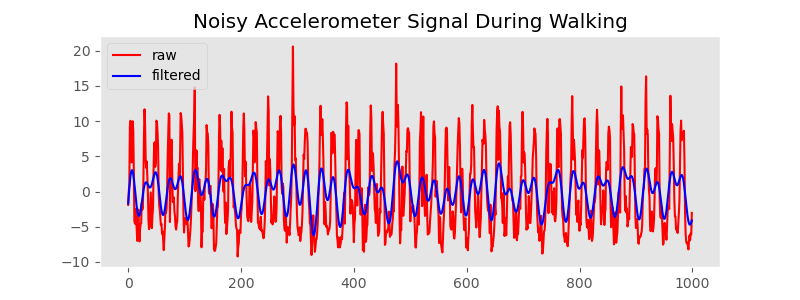

In [59]:
# Apply the butterworth filter on the signal
filtered_signal = filtfilt(b, a, signal)

# plot accelerometer data
plt.figure(figsize=(8,3))
pl.plot(signal, 'r-',label='raw')
pl.plot(filtered_signal, 'b-',label='filtered')
plt.title("Noisy Accelerometer Signal During Walking")
plt.legend()
pl.grid()
pl.show()